# Введение

Teachable Machine – это веб-версия инструмента, которая позволяет всем желающим легко создать модель машинного обучения.

Чтобы научить компьютер распознавать изображения, звуки и позы с помощью Teachable Machine не нужно писать код. Вы можете использовать модель в своих проектах, на сайтах, в приложениях и не только.

Сервис Teachable Machine доступен по ссылке [teachablemachine.withgoogle.com](teachablemachine.withgoogle.com).  Язык пользовательского интерфейса - русский.

Перед обучением модели рекомендуем внимательно изучить дополнительную информацию, расположенную на главной странице сервиса:

* Что такое Teachable Machine?

* Как пользоваться инструментом?

* С помощью чего можно обучить модель?

* Руководства

# Проекты с изображениями.

## Задание 1. 

1. Перейдите по ссылке [teachablemachine.withgoogle.com](teachablemachine.withgoogle.com) и нажмите "Начать".

2. Выберите "Проект с изображениями", далее "Стандартная модель изображения".

Необходимо обучить модель различать две группы изображений: хот-доги и не хот-доги с помощью готового (размеченного) набора изображений.

3. Переименуйте "Class 1" в "хот-доги", а "Class 2" в "не хот-доги".

4. В классе "хот-доги" нажмите на кнопку "Загрузить", затем выберите пункт "Выберите изображения из файлов".

5. Выберите папку "hot_dog_train". Необходимо выбрать все изображения в папке с помощью клавиш Ctrl+A и нажать "Открыть".

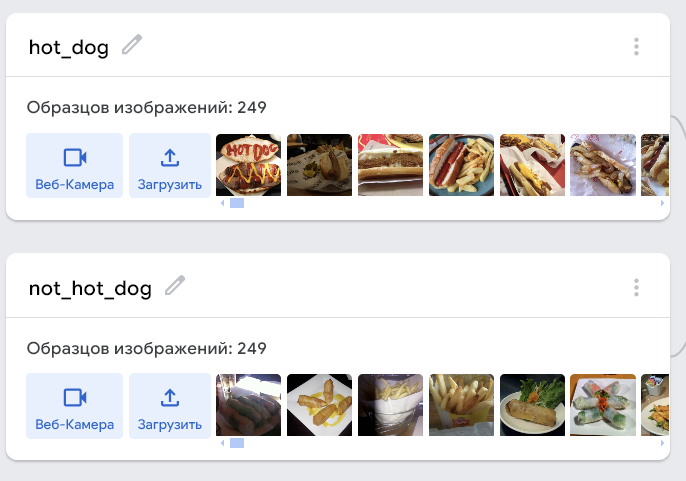

6. Аналогично нужно добавить изображения из папки "not_hot_dog_train" в класс "не хот-доги".
7. Запустите обучение модели, нажав на кнопку "Обучить модель". Обучение происходит на текущей вкладке браузера некоторое время, поэтому не следует переключаться между вкладками во время процесса обучения.
8. В разделе "Обучение" раскройте список "Дополнительно" и выберите "Дополнительные сведения". Они откроются справа. Изучите данный раздел. Обратите внимание на раздел "Точность на каждый класс".

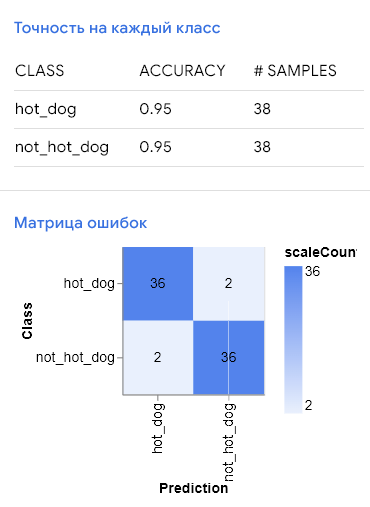

9. Справа от раздела "Обучение" находится раздел "Посмотреть", в котором можно проверить, как работает обученная модель. Для этого вместо "webcam" нужно выбрать "файл" и выбрать один файл из папки "hot_dog_validation".

10. Посмотрите результат (прогноз) в разделе "Выходные данные" и сделайте вывод, насколько правильно модель определила наличие хот-дога на изображении. Загрузите поочередно еще 10 изображений и проверьте правильность определения "хот-догов". __Напишите вывод в отчете__.

11. Аналогичным образом загрузите поочередно 10 изображений из папки "not_hot_dog_validation". Сделайте вывод о правильности определения "не хот-догов". __Напишите вывод в отчете__.

12. Сохраните модель. 
13. Изучите и скопируйте фрагмент кода, который можно использовать в вашей модели. Используя фрагмент кода, загрузите модель в jupyter notebook и проверьте ее работу на всех изображениях (папки hot_dog_validation и not_hot_dog_validation).

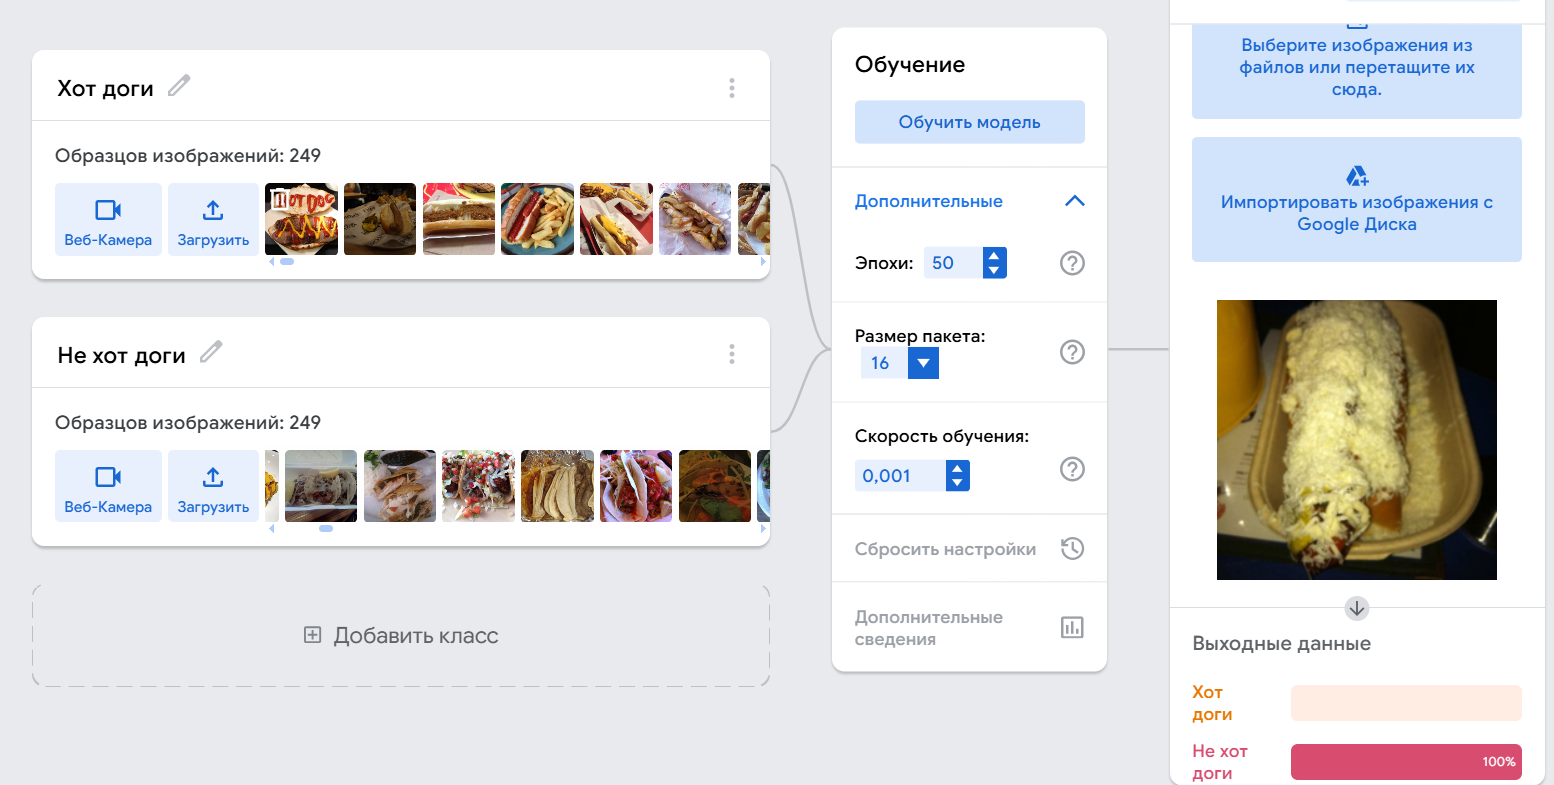

Загрузила 10 фотографий из "hot_dog_validation". 

Те, на которых было точно видно хот дог и не имели на заднем фоне других объктов, определялись как 100% "Хот доги"

Фотографии с человеком работали 50% на 50%.

Если на заднем фоне присутсвовал стакан, то вероятность хот дога падала.

Чтобы модель поняла, что это хот дог на картинке достаточно сосиски и теста.

На фотографии выше взята фотография из папки "hot_dog_validation", на которой не видно сосиски и теста, поэтому он не определил его как хот дог

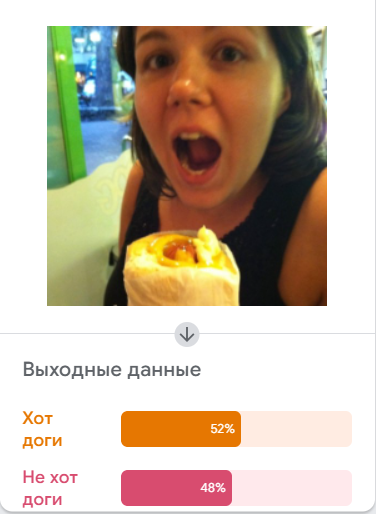

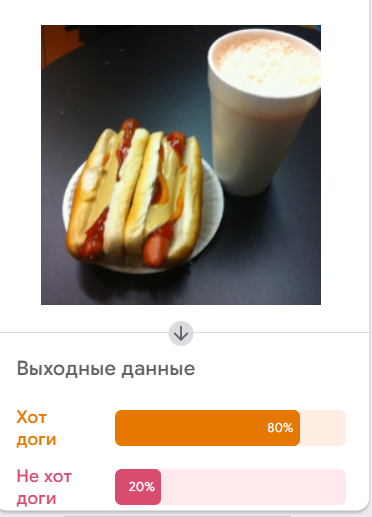

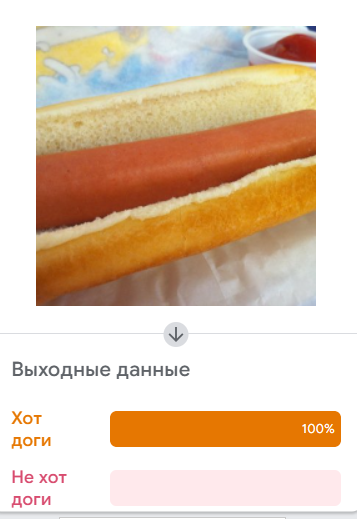

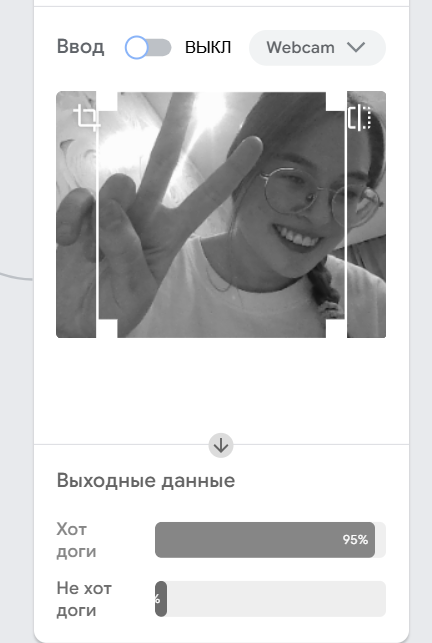

Определяет пальцы как сосиски?

Загрузила 10 фотографий из "not_hot_dog_validation"

Почти все изображения "не хот доги" 100%

Если что-то похожее на сосиску сфоткана вблизи, то определения "не хот дог падает"

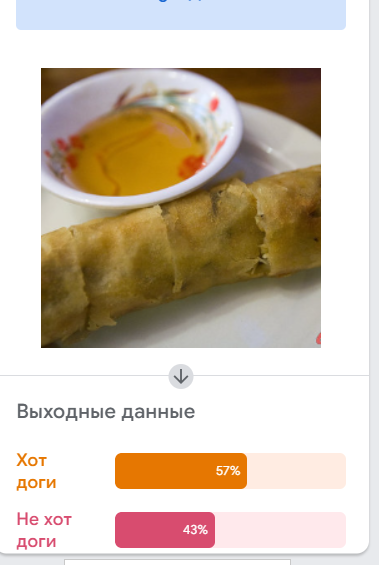

## Задание 2. 

1. Соберите коллекцию изображений как минимум трех классов (можно сделать больше классов). В каждом классе должно быть минимум 20 изображений. Можно использовать изображения из интернета или создать собственные изображения с помощью камеры.

2. Обучите модель в сервисе Teachable Machine.

3. В отчете укажите названия классов и точность на каждый класс. Добавьте скриншоты.

4. Сделайте вывод, как точно модель определяет неизвестные ей изображения.

5. Сохраните модель.
6. Используя фрагмент кода, загрузите модель в jupyter notebook и проверьте ее работу на нескольких изображениях.

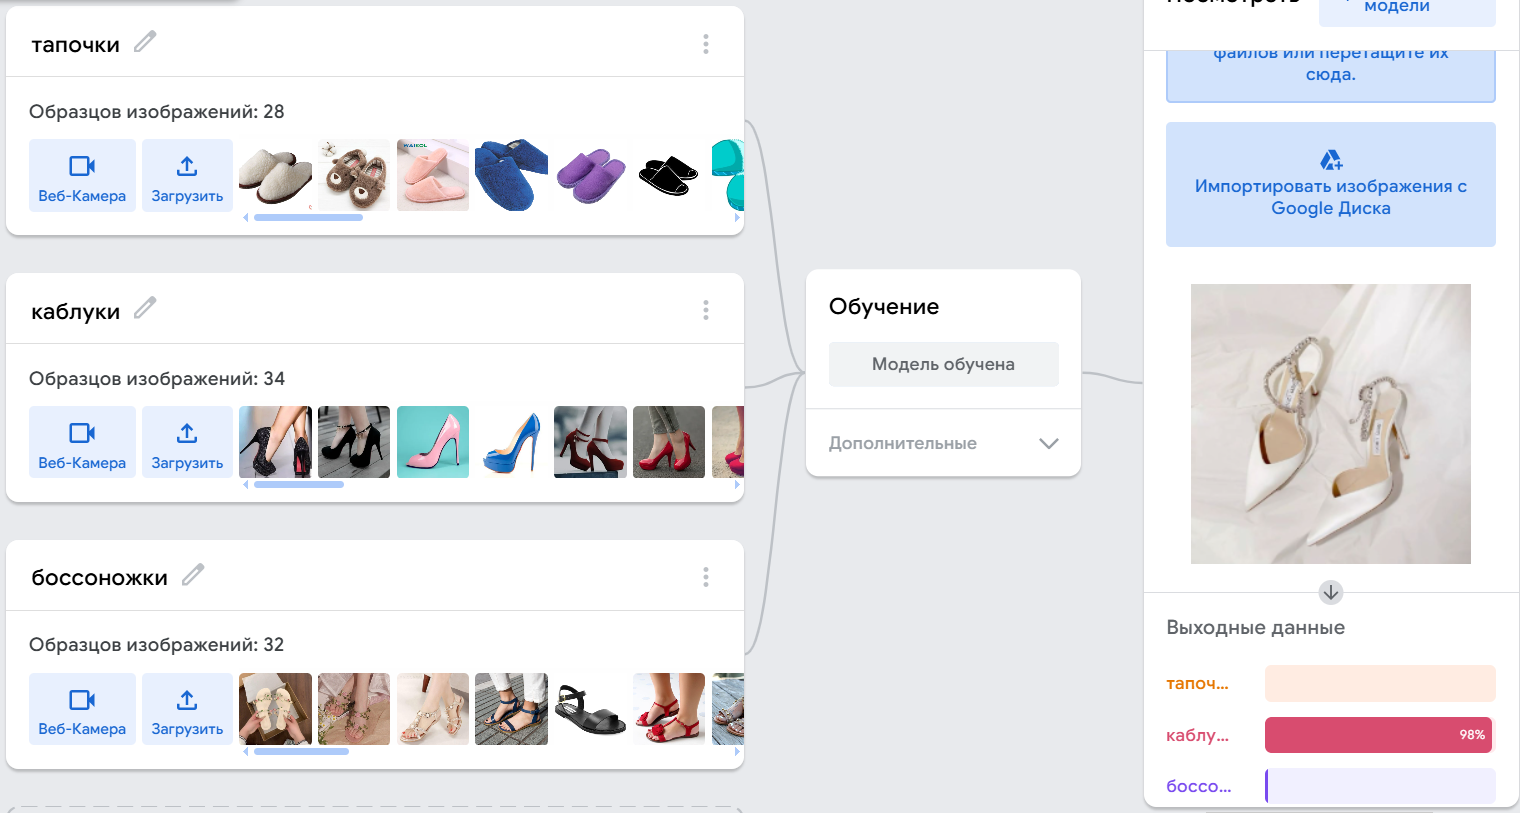

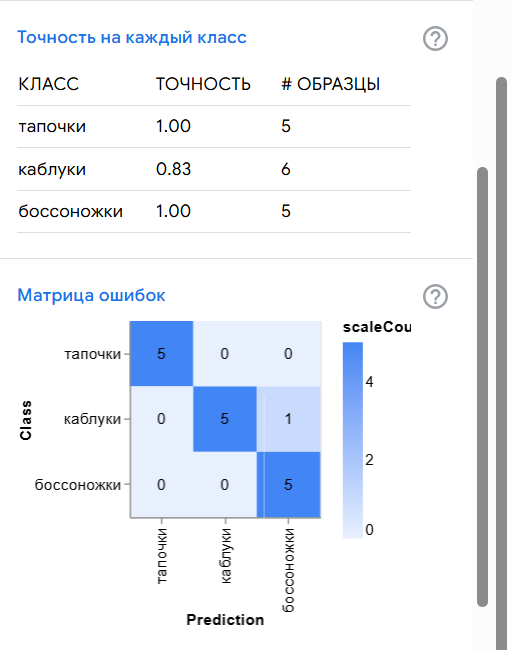

Модель показывает очень высокую точность в определении изображений обуви. Она идеально определяет тапочки и боссоножки, а с каблуками есть небольшая погрешность, где происходит путаница с боссоножками.

In [1]:
# First, install TensorFlow which includes Keras
# The error shows that TensorFlow is not installed
# Uncomment and run this line to install TensorFlow
!pip install tensorflow

# Then use the correct import path for Keras in TensorFlow 2.x
import tensorflow as tf
from keras.models import load_model  # Прямой импорт из keras
from PIL import Image, ImageOps
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("keras_Model.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
# You need to specify an actual path to your image file
image = Image.open(r"C:\Users\user\Desktop\проекты\Проекты Jupyter\хот доги\тест 2 задание\каблуки1.jpg").convert("RGB")  # Replace with your actual image path

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)

1/1 [==============================] - 0s 442ms/step
Class: РєР°Р±Р»СѓРєРё
Confidence Score: 0.981557


Модель хорошо предсказывает для класс.

## Задание 3.

Pocket AutoML — это Android-приложение, которое позволяет тренировать модели глубокого обучения (deep learning) для классификации изображений без написания кода. Есть возможность экспортировать модель в формате TensorFlow Lite и создать на основе этой модели собственное Android-приложение, для чего прилагается пошаговое руководство.

Тренировка работает прямо на устройстве, за счёт этого для неё не требуется подключение к интернету, нет проблем с конфиденциальностью, т.к. изображения не покидают устройства пользователя. Теми же преимуществами будут обладать и приложения, созданные на основе экспортированных из Pocket AutoML моделей. Единственная функция, требующая подключения к интернету, это экспорт в TensorFlow Lite.

1. Установите приложение Pocket AutoML на свой смартфон.
2. Создайте новую задачу.
3. Создайте минимум 3 класса объектов, которые будут использоваться в модели распознавания образов.
4. На вкладке "Данные" в каждый класс добавьте минимум по 10 изображений (можно использовать камеру или загрузить готовые изображения).
5. На вкладке "Модель" выполните тренировку модели.
6. На вкладке "Распознать" проверьте качество распознавания изображений, показывая модели поочередно несколько объектов (можно использовать камеру или загрузить готовые изображения). При распознавании помогите модели работать лучше, подтвердив или исправив результат распознавания. После каждого нового распознавания и подтверждения изображение добавляется в соответствующий класс. Распознайте как минимум 10 изображений.
7. Снова выполните тренировку модели. После этого снова проверьте качество распознавания, предлагая модели новые изображения.
8. Сделайте скриншоты вкладок "Данные" и "Модель". Разместите эти скриншоты в отчет.
9. В отчете напишите вывод о качестве распознавания изображений вашей модели. Попытайтесь объяснить причины, почему модель в некоторых случаях ошибается.

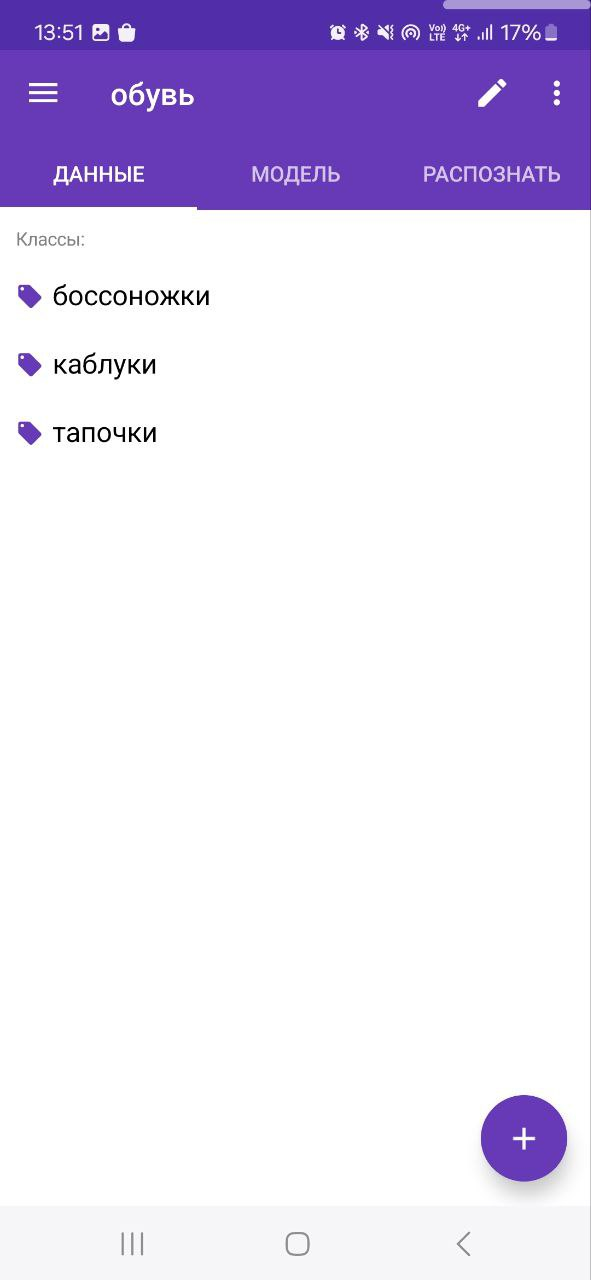

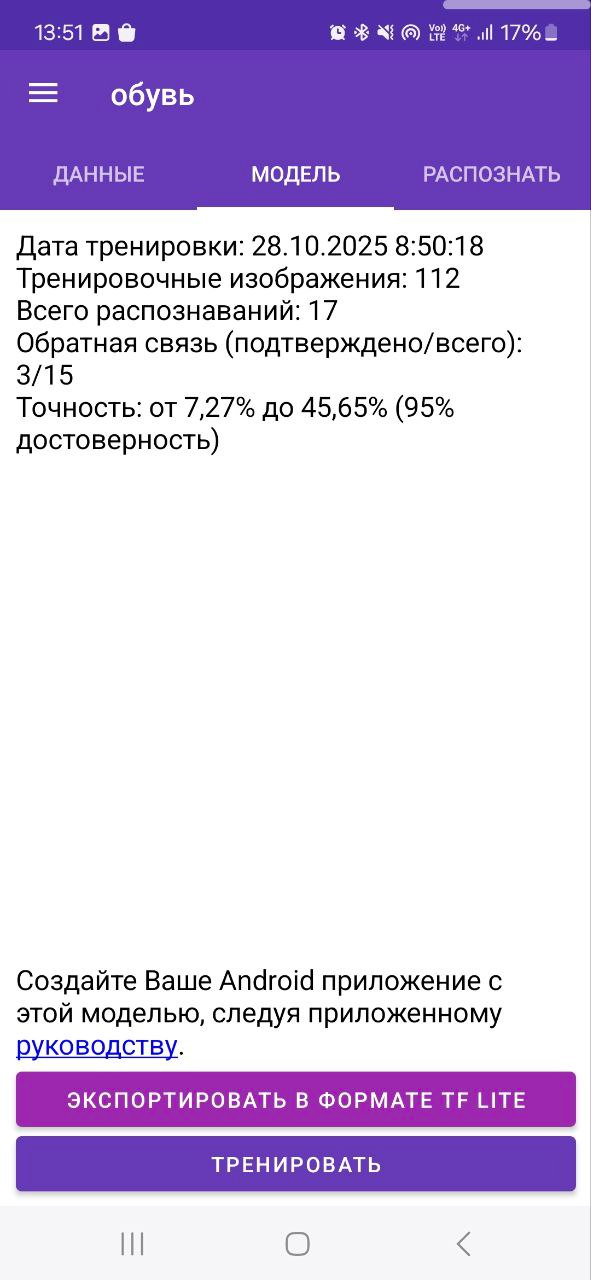

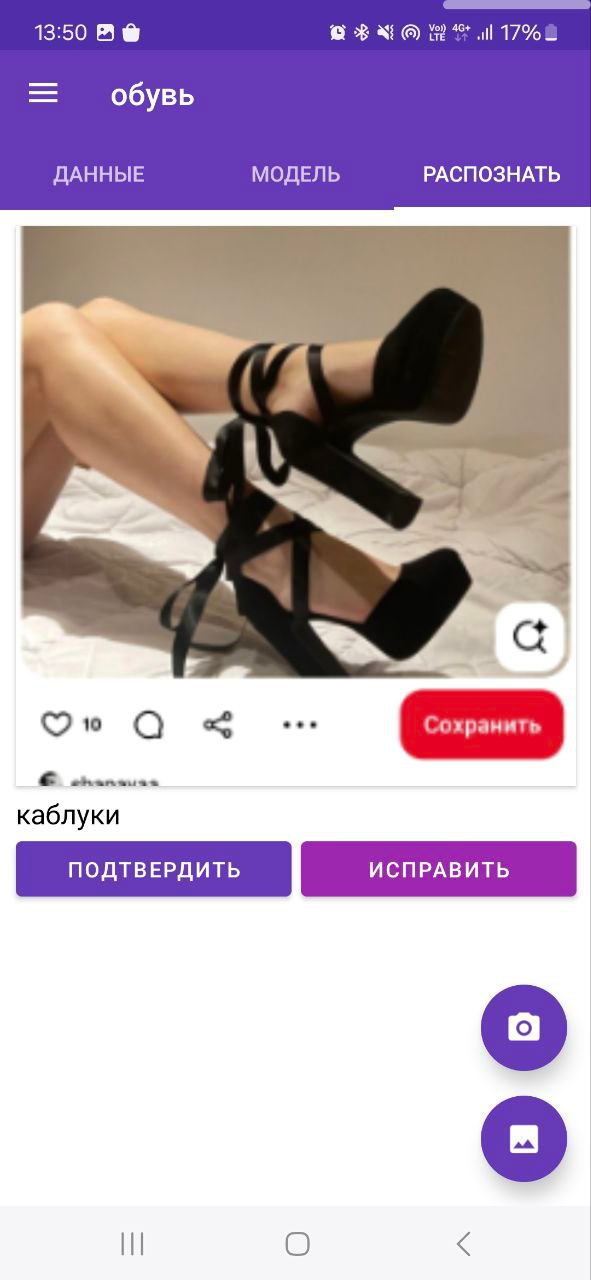

Модель может ошибаться между каблуками и боссоножками, так как некторые каблуки могут имет низкий каблук, а боссоножки в свою очередь выскую платфому. Из-за чего, по моему мнению, модель может ошибаться.

## Задание 4.

1. Разработайте программный интерфейс для модели машинного обучения. API должен позволить приложению пользователя получить результат и точность распознавания.
2. Разработайте приложение с графическим интерфейсом, которое должно позволить загрузить изображение и с помощью разработанного API показать результат распознавания.